In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from FFNN import FFNN

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

y_one_hot = [[1 if i == label else 0 for i in range(3)] for label in y]

# 70% training - 15% validation - 15% testing
X_train, X_temp, y_train, y_temp = train_test_split(X, y_one_hot, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [3]:
ffnn = FFNN(input_size=4, hidden_size=5, output_size=3, learning_rate=0.5, hidden_activation='relu', output_activation='sigmoid')
ffnn.train(X_train, y_train, X_val, y_val, epochs=50)

correct = 0
for inputs, target in zip(X_test, y_test):
    prediction = ffnn.predict(inputs)
    predicted_class = prediction.index(max(prediction))
    actual_class = target.index(max(target))
    if predicted_class == actual_class:
        correct += 1

print(f"Akurasi: {correct / len(y_test) * 100:.2f}%")

Epoch 0, Loss: 0.2168
Epoch 1, Loss: 0.1649
Epoch 2, Loss: 0.1313
Epoch 3, Loss: 0.1178
Epoch 4, Loss: 0.1095
Epoch 5, Loss: 0.1027
Epoch 6, Loss: 0.0966
Epoch 7, Loss: 0.0907
Epoch 8, Loss: 0.0827
Epoch 9, Loss: 0.0717
Epoch 10, Loss: 0.0621
Epoch 11, Loss: 0.0536
Epoch 12, Loss: 0.0467
Epoch 13, Loss: 0.0414
Epoch 14, Loss: 0.0371
Epoch 15, Loss: 0.0338
Epoch 16, Loss: 0.0311
Epoch 17, Loss: 0.0289
Epoch 18, Loss: 0.0271
Epoch 19, Loss: 0.0256
Epoch 20, Loss: 0.0243
Epoch 21, Loss: 0.0231
Epoch 22, Loss: 0.0222
Epoch 23, Loss: 0.0213
Epoch 24, Loss: 0.0206
Epoch 25, Loss: 0.0200
Epoch 26, Loss: 0.0195
Epoch 27, Loss: 0.0191
Epoch 28, Loss: 0.0188
Epoch 29, Loss: 0.0187
Epoch 30, Loss: 0.0185
Epoch 31, Loss: 0.0185
Epoch 32, Loss: 0.0185
Epoch 33, Loss: 0.0186
Epoch 34, Loss: 0.0187
Epoch 35, Loss: 0.0189
Epoch 36, Loss: 0.0191
Epoch 37, Loss: 0.0193
Epoch 38, Loss: 0.0195
Epoch 39, Loss: 0.0197
Epoch 40, Loss: 0.0200
Epoch 41, Loss: 0.0202
Epoch 42, Loss: 0.0205
Epoch 43, Loss: 0.020

In [4]:
ffnn.compare_lib(X_train, y_train, X_test, y_test)

Accuracy FFNN: 95.65%
Accuracy MLP Sklearn: 100.00%


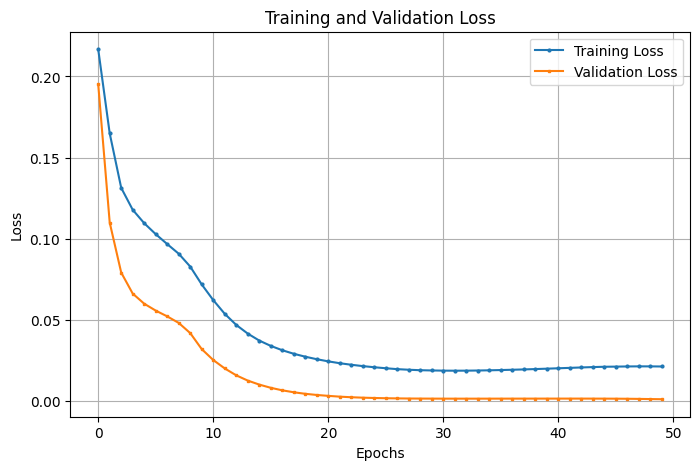

In [5]:
ffnn.plot_training_history()

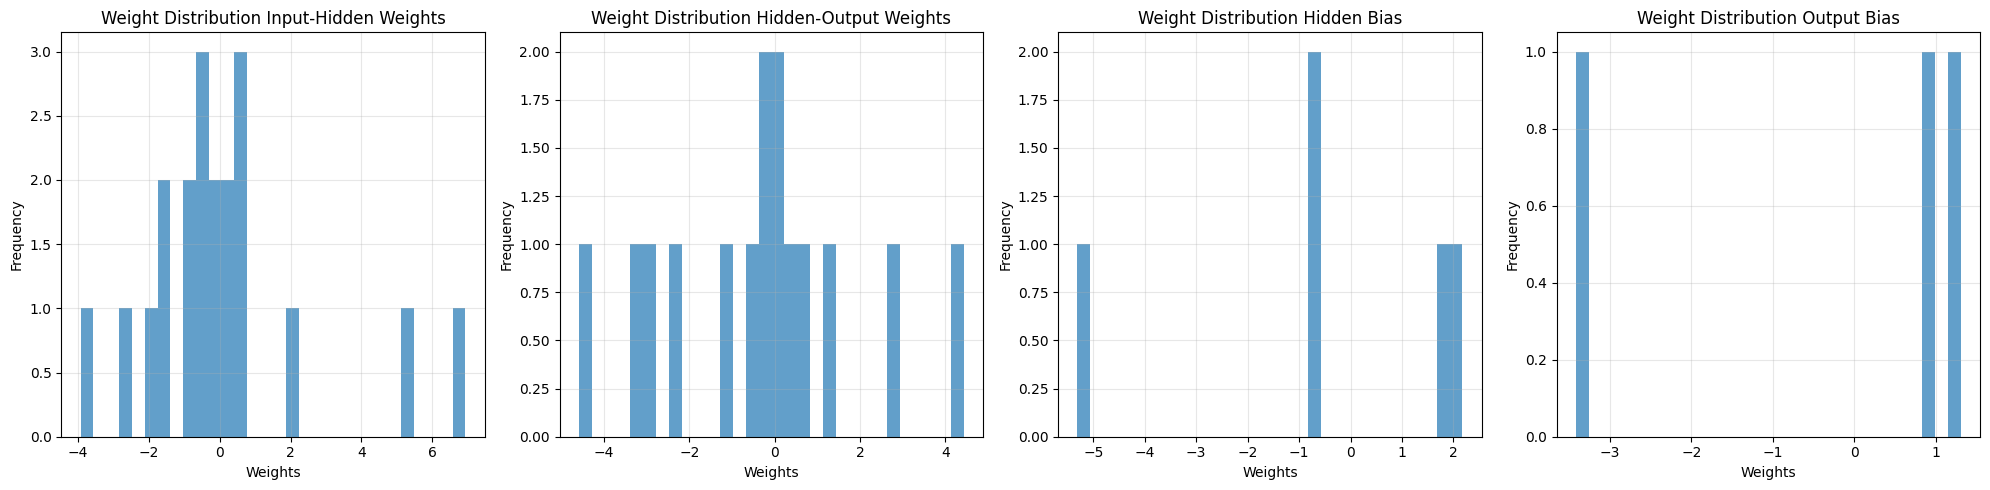

In [6]:
ffnn.plot_weight_distributions()

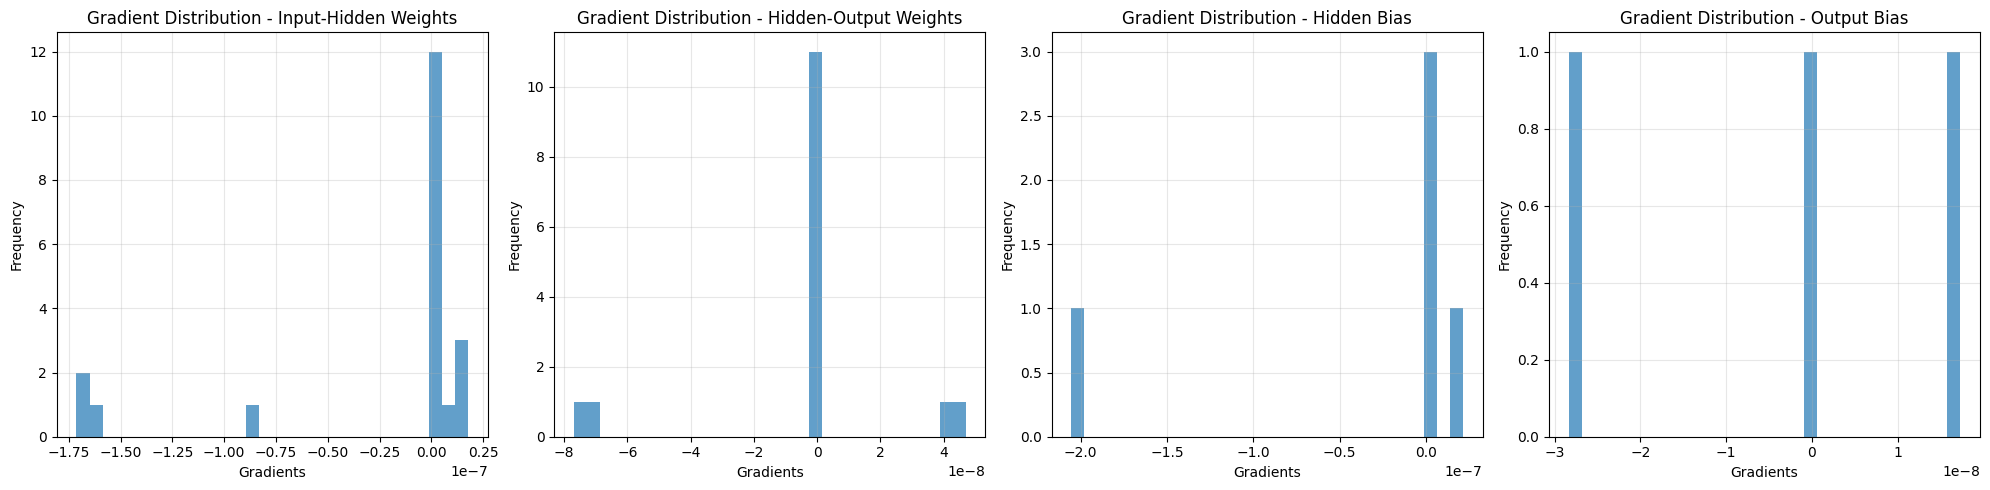

In [7]:
ffnn.plot_gradient_distributions()